In [57]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile

In [58]:
frames = 128
buffer = np.zeros(frames * 4)
padding = len(buffer) * 2
possible_notes = ['E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#']
possible_tokens = [f'{i}_short' for i in possible_notes] + [f'{i}_long' for i in possible_notes]

In [59]:
def hps(y, samplerate, harmonics = 5): # https://github.com/TomSchimansky/GuitarTuner/blob/master/tuner_audio/audio_analyzer.py

    buffer[:-frames] = buffer[frames:]
    if frames != len(y):
        buffer[-frames:-(frames - len(y))] = y
    else:
        buffer[-frames:] = y

    # applying hanning window to reduce spectral leakage
    window = np.array(buffer) * np.hanning(len(buffer))

    # zero padding
    amplitudes = np.abs(np.fft.fft(np.pad(window, (0, len(buffer) * 2))))
    # only use the first half of the fft output data
    amplitudes = amplitudes[:int(len(amplitudes) / 2)]

    frequencies = np.fft.fftfreq(len(amplitudes) * 2, 1 / samplerate)

    # HPS: multiply data by itself with different scalings (Harmonic Product Spectrum)
    hps_spectrum = amplitudes.copy()
    for i in range(2, harmonics + 1):
        multiples = amplitudes[::i] 
        hps_spectrum[:len(multiples)] *= amplitudes[::i]

    return frequencies[np.argmax(hps_spectrum)]

In [60]:
samplerate, data = wavfile.read('../sound_samples/Kalyani 9 Ata talam.wav')

In [49]:
data.shape

(5917632, 2)

c:\Users\reach\code\music-corrections\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


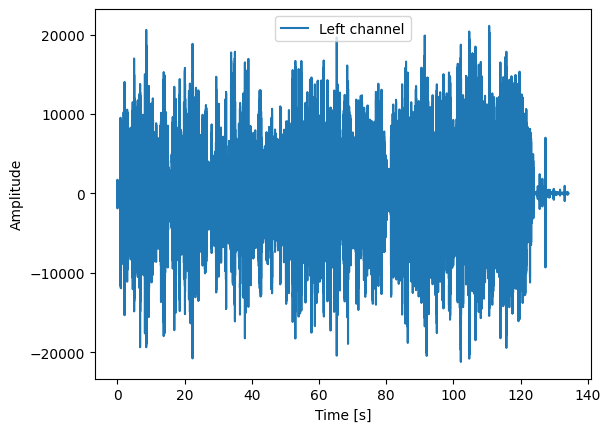

In [33]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., data.shape[0] / samplerate, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
# plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [50]:
data = data[:, 0]
l = data.shape[0]
data = data[:l // 12]

In [51]:
data.shape

(493136,)

In [52]:
frequencies = []

for i in range(0, len(data), frames):
    freq = hps(data[i:i + frames], samplerate)
    frequencies.append(freq)

frequencies = np.array(frequencies)

In [53]:
frequencies

array([  0.       ,   0.       ,   0.       , ..., 660.3515625,
       660.3515625, 660.3515625])

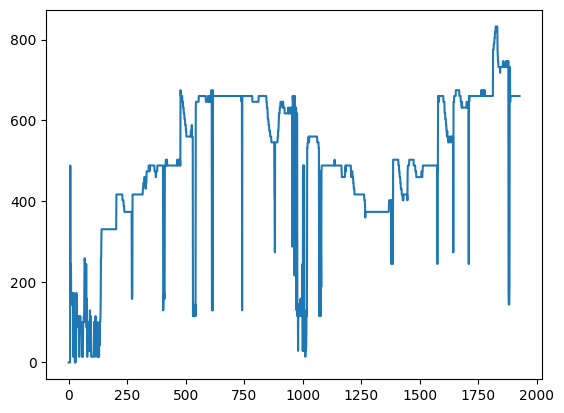

In [54]:
plt.plot(frequencies)

In [56]:
frequencies[250:300]

array([373.2421875 , 373.2421875 , 373.2421875 , 373.2421875 ,
       373.2421875 , 373.2421875 , 373.2421875 , 373.2421875 ,
       373.2421875 , 373.2421875 , 373.2421875 , 373.2421875 ,
       373.2421875 , 373.2421875 , 373.2421875 , 373.2421875 ,
       373.2421875 , 373.2421875 , 373.2421875 , 373.2421875 ,
       157.91015625, 157.91015625, 157.91015625, 416.30859375,
       416.30859375, 416.30859375, 416.30859375, 416.30859375,
       416.30859375, 416.30859375, 416.30859375, 416.30859375,
       416.30859375, 416.30859375, 416.30859375, 416.30859375,
       416.30859375, 416.30859375, 416.30859375, 416.30859375,
       416.30859375, 416.30859375, 416.30859375, 416.30859375,
       416.30859375, 416.30859375, 416.30859375, 416.30859375,
       416.30859375, 416.30859375])

In [20]:
root = '../sound_samples/'
recs = [np.array(i) for i in log]
for file_name in os.listdir(root):
    if 'wav' not in file_name or 'Mayamalavagowla' in file_name:
        continue
    # Load the WAV file
    file_path = root + file_name
    y, sr = librosa.load(file_path)
    print(len(y), sr)

    frequencies = []

    for i in range(0, len(y), frames):
        freq = hps(y[i:i + frames], sr)
        frequencies.append(freq)

    frequencies = np.array(frequencies)
    
    print(frequencies.min(), frequencies.max())

    # Print or return the fundamental frequencies array
    recs.append(frequencies)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\reach\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\reach\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\reach\code\music-corrections\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\reach\code\music-corrections\.venv\lib\site-packages\traitlets\config\applicatio

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [ ]:
all_freqs = np.concatenate(recs)

# processing frequencies and converting them to readable notes

def hz_to_note(hz):
  try:
    note = librosa.hz_to_note(hz, octave=False)
  except:
    return None
  note = note.replace('♯', '#')
  return note

notes = []
for i in all_freqs:
  note = hz_to_note(i)
  if note is not None:
    notes.append(possible_notes.index(note))

notes, len(notes)

([2,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  11,
  11,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  0,
  0,
  0,
  0,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  0,
  0,
  0,
  0,
  11,
  11,
  11,
  10,
  10,
  10,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  0,
  0,
  9,
  9,
  10,
  10,
  11,
  1,
  1,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  11,
  11,
  11,
  11,
  11,
  0,
  0,
  0,
  0,
  0,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  10,
  9,
  9,
  9,
  9,
  9,
  9,
  0,
  0,
  0,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  7,


In [ ]:
# process notes and form short/long notes based on 10 note moving average

from collections import deque

streak = 1
average = deque([0] * 10)
prev = notes[0]
n = 10

corrected_notes = []

for i in range(1, len(notes)):
    if notes[i] == notes[i - 1]:
        streak += 1
    else:
        avg = sum(average) / len(average)
        if streak >= avg:
            corrected_notes.append(notes[i] + len(possible_notes))
        else:
            corrected_notes.append(notes[i])
        average.append(streak)
        if len(average) == n + 1:
            average.popleft()
        streak = 0

corrected_notes, len(corrected_notes)


([12,
  23,
  0,
  23,
  12,
  11,
  12,
  11,
  10,
  9,
  0,
  9,
  10,
  11,
  1,
  2,
  0,
  23,
  12,
  11,
  22,
  9,
  12,
  9,
  19,
  18,
  7,
  18,
  5,
  4,
  7,
  18,
  7,
  23,
  0,
  11,
  10,
  9,
  0,
  23,
  0,
  23,
  10,
  9,
  12,
  9,
  12,
  11,
  10,
  9,
  12,
  23,
  12,
  9,
  19,
  18,
  7,
  17,
  4,
  7,
  6,
  7,
  22,
  0,
  11,
  10,
  9,
  0,
  23,
  0,
  16,
  3,
  2,
  17,
  4,
  3,
  2,
  17,
  2,
  12,
  23,
  12,
  1,
  0,
  14,
  0,
  23,
  0,
  2,
  0,
  23,
  0,
  9,
  12,
  11,
  0,
  11,
  10,
  9,
  23,
  10,
  9,
  23,
  0,
  11,
  12,
  11,
  12,
  11,
  12,
  23,
  0,
  10,
  9,
  19,
  6,
  7,
  17,
  4,
  7,
  6,
  7,
  21,
  10,
  0,
  11,
  10,
  9,
  0,
  19,
  18,
  7,
  16,
  5,
  7,
  0,
  11,
  9,
  7,
  5,
  4,
  5,
  7,
  18,
  7,
  4,
  14,
  12,
  23,
  0,
  16,
  2,
  4,
  7,
  5,
  6,
  7,
  18,
  7,
  17,
  4,
  7,
  18,
  7,
  18,
  5,
  4,
  12,
  11,
  0,
  11,
  10,
  9,
  12,
  11,
  10,
  9,
  8,
  19,
  12,
  11,
  1

In [ ]:
from tokenizers import Tokenizer, models, pre_tokenizers, trainers

# Define a custom tokenizer
tokenizer = Tokenizer(models.WordLevel(unk_token="[UNK]"))
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# Train the tokenizer on your sequences
trainer = trainers.WordLevelTrainer(vocab_size=len(possible_tokens), special_tokens=["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"])
tokenizer.train_from_iterator([' '.join([str(i) for i in corrected_notes])], trainer)

# Save the tokenizer
tokenizer.save("tokenizer.json")

In [77]:
from transformers import GPT2Config, GPT2LMHeadModel

# Configure the model
config = GPT2Config(
    vocab_size=tokenizer.get_vocab_size(),
    n_positions=1024,
    n_ctx=1024,
    n_embd=768,
    n_layer=12,
    n_head=12,
)

# Initialize the model
model = GPT2LMHeadModel(config)

c:\Users\reach\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [78]:
from transformers import PreTrainedTokenizerFast

# Load the tokenizer
fast_tokenizer = PreTrainedTokenizerFast(tokenizer_file="tokenizer.json")

# Add special tokens
fast_tokenizer.add_special_tokens({
    "pad_token": "[PAD]",
    "cls_token": "[CLS]",
    "sep_token": "[SEP]",
    "mask_token": "[MASK]",
})

# Resize model embeddings to match the tokenizer
model.resize_token_embeddings(len(fast_tokenizer))

Embedding(24, 768)

In [84]:
import torch
from transformers import Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_metric

# Prepare the dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, sequences, tokenizer):
        self.sequences = sequences
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        encoded = self.tokenizer(sequence, return_tensors='pt', padding='max_length', truncation=True, max_length=512)
        input_ids = encoded['input_ids'].squeeze()
        attention_mask = encoded['attention_mask'].squeeze()
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': input_ids}

# Create dataset and data collator
dataset = Dataset([' '.join([str(i) for i in corrected_notes])], fast_tokenizer)
data_collator = DataCollatorForLanguageModeling(tokenizer=fast_tokenizer, mlm=False)

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=4,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir='./logs',
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)

# Fine-tune the model
trainer.train()


ImportError: cannot import name 'HfFileSystem' from 'huggingface_hub' (c:\Users\reach\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\__init__.py)

In [82]:
trainer.state.log_history

[{'train_runtime': 49.8571,
  'train_samples_per_second': 0.201,
  'train_steps_per_second': 0.201,
  'total_flos': 2612920320000.0,
  'train_loss': 2.6144948959350587,
  'epoch': 10.0,
  'step': 10}]